In [181]:
import numpy as np 
import IPython.display as ipd
import librosa
from librosa import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import wavfile
from scipy.signal import convolve2d

In [70]:
signal, fsp = librosa.load('guitar.wav', sr=16000, mono=True)

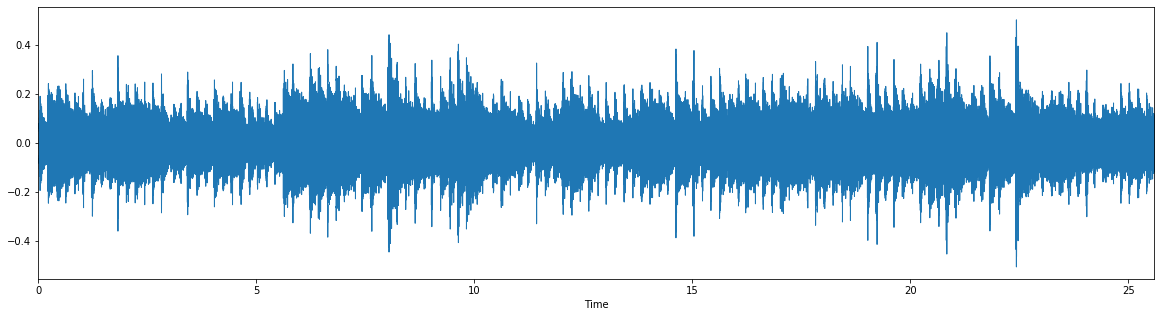

In [71]:
plt.figure(figsize=(20,5))
display.waveplot(signal, fsp)
plt.show()

In [59]:
ipd.Audio(signal, rate=fsp)

In [72]:
#echo filter
echo = np.zeros(fsp)
for i in range(0,4):
    echo[int(fsp*i/4)] = ((4-i)/4)**3

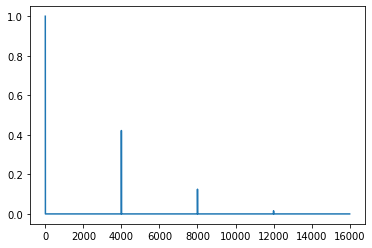

In [73]:
plt.plot(echo)

Here is the convolution operator for discrete signals:
<center>$(a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$</center>

In [74]:
result = np.convolve(signal,echo,mode='same')

In [75]:
ipd.Audio(result, rate=fsp)

In [149]:
echo[:15970:-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [160]:
def convolve(a, b):
    y = np.zeros(a.size) #same
    size = b.size
    for i in range(a.size):
        if i+size<=y.size:
            y[i] = a[i:i+size].dot(b[::-1])
        else:
            y[i] = a[i:].dot(b[:i+size-y.size-1:-1])
    return y

In [161]:
result2 = convolve(signal,echo)

In [163]:
ipd.Audio(result2, rate=fsp)

In [132]:
result2.size==result.size==signal.size

True

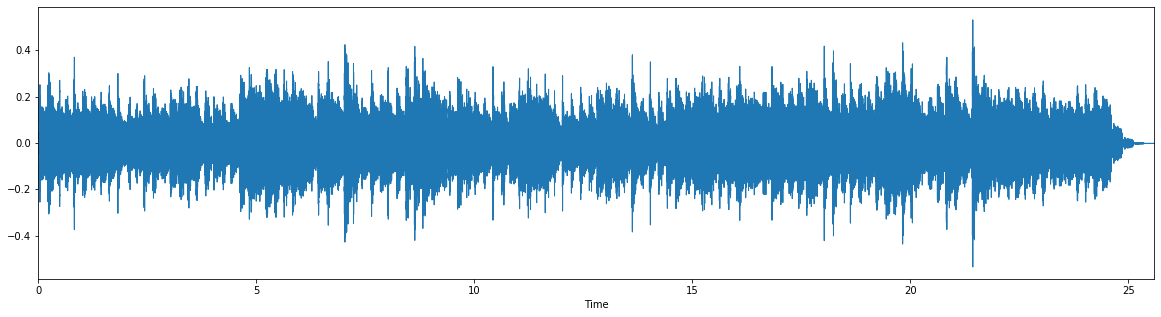

In [164]:
plt.figure(figsize=(20,5))
display.waveplot(result2, fsp)
plt.show()

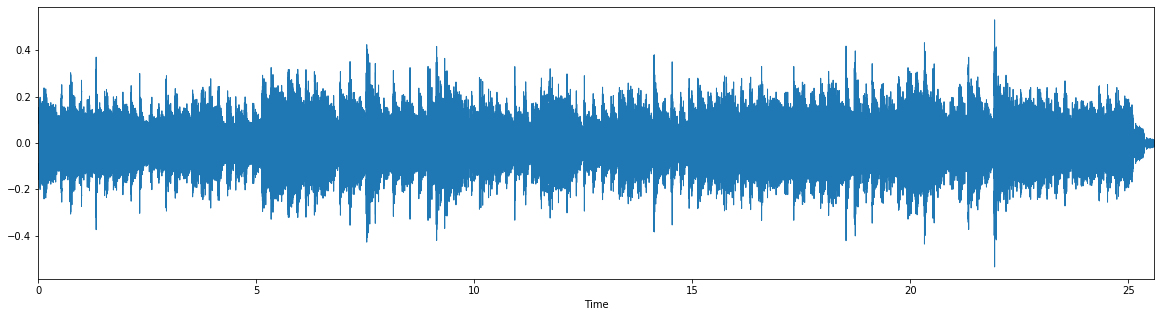

In [162]:
plt.figure(figsize=(20,5))
display.waveplot(result, fsp)
plt.show()

In [138]:
result[16000:16100]

array([-0.13344844, -0.14562193, -0.11649197, -0.1028378 , -0.12417246,
       -0.13243797, -0.12967196, -0.1203329 , -0.1116627 , -0.10431364,
       -0.08403839, -0.08392341, -0.10538811, -0.10663285, -0.07738166,
       -0.04829965, -0.01607281,  0.02223578,  0.04936958,  0.07252492,
        0.07852544,  0.0669333 ,  0.06626838,  0.06559296,  0.05039202,
        0.05371694,  0.05941078,  0.04561932,  0.04085808,  0.0479983 ,
        0.05814482,  0.06377583,  0.07049999,  0.08311   ,  0.09198321,
        0.08348183,  0.08422694,  0.10238116,  0.10427515,  0.08773141,
        0.06939315,  0.07560131,  0.08304239,  0.06716012,  0.05490555,
        0.06597054,  0.07110993,  0.05904267,  0.04422484,  0.03430269,
        0.02421688,  0.01022329,  0.02850511,  0.04608043,  0.02225406,
       -0.01205586, -0.01512486, -0.00422071,  0.00284552,  0.02569002,
        0.04686232,  0.05701631,  0.0557635 ,  0.0282941 ,  0.00842708,
        0.01118077, -0.00472343, -0.01763923, -0.01916009, -0.03

In [146]:
result2[8000:8100]

array([-0.13344844, -0.14562193, -0.11649197, -0.1028378 , -0.12417246,
       -0.13243797, -0.12967196, -0.1203329 , -0.1116627 , -0.10431364,
       -0.08403839, -0.08392341, -0.10538811, -0.10663285, -0.07738166,
       -0.04829965, -0.01607281,  0.02223578,  0.04936958,  0.07252492,
        0.07852544,  0.0669333 ,  0.06626838,  0.06559296,  0.05039202,
        0.05371694,  0.05941078,  0.04561932,  0.04085808,  0.0479983 ,
        0.05814482,  0.06377583,  0.07049999,  0.08311   ,  0.09198321,
        0.08348183,  0.08422694,  0.10238116,  0.10427515,  0.08773141,
        0.06939315,  0.07560131,  0.08304239,  0.06716012,  0.05490555,
        0.06597054,  0.07110993,  0.05904267,  0.04422484,  0.03430269,
        0.02421688,  0.01022329,  0.02850511,  0.04608043,  0.02225406,
       -0.01205586, -0.01512486, -0.00422071,  0.00284552,  0.02569002,
        0.04686232,  0.05701631,  0.0557635 ,  0.0282941 ,  0.00842708,
        0.01118077, -0.00472343, -0.01763923, -0.01916009, -0.03

My convolution function seems to be ahead of the numpy one by half the sampling rate. I'll try to implement a different version later.

In [167]:
lena = mpimg.imread('Lenna.png')

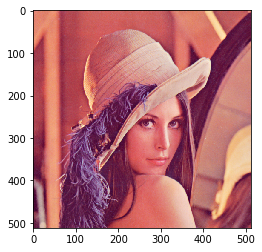

In [169]:
plt.imshow(lena)

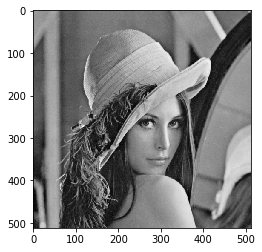

In [178]:
plt.imshow(lena.mean(axis=2),cmap='gray')

In [179]:
bw = lena.mean(axis=2)

In [190]:
# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

In [197]:
W.max()

0.9900498337491681

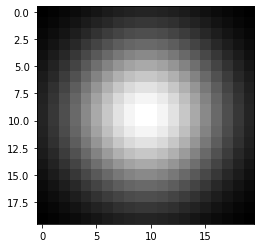

In [194]:
plt.imshow(W,cmap='gray')

In [191]:
lena_blur = convolve2d(bw,W,mode='same')

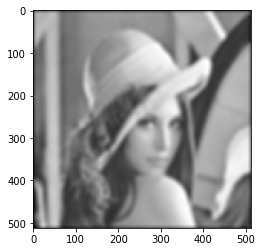

In [192]:
plt.imshow(lena_blur, cmap='gray')

In [201]:
Lx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Ly = Lx.T

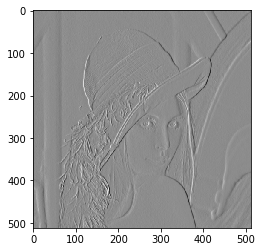

In [204]:
lena_lx = convolve2d(bw,Lx,mode='same')
plt.imshow(lena_lx, cmap='gray')

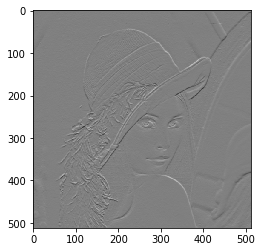

In [205]:
lena_ly = convolve2d(bw,Ly,mode='same')
plt.imshow(lena_ly, cmap='gray')

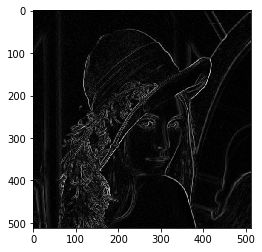

In [207]:
lena_edge = np.sqrt(lena_lx*lena_lx+lena_ly*lena_ly)
plt.imshow(lena_edge, cmap='gray')